In [18]:
import pandas as pd
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


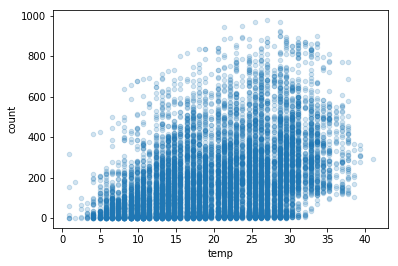

In [19]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)

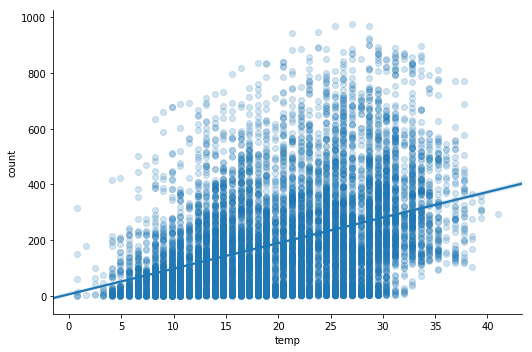

In [20]:
import seaborn as sns # seaborn을 사용하면 가장 잘 맞는 선을 얻을 수 있음
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [21]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


In [28]:
bikes[['count', 'weather']].corr()

,count,weather
count,1.000000,-0.128655
weather,-0.128655,1.000000


두 값 사이에는 상관관계가 있다. 이제 선형 회귀 형태로 돌아가 보자.

In [22]:
# X와 y를 만든다.
feature_cols = ['temp'] # 예측 변수의 목록
X = bikes[feature_cols] # 예측 변수로 하위 집합을 지정
y = bikes['count'] # 응답 변수

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
limreg = LinearRegression()
limreg.fit(X,y)

# 계수 출력
print(limreg.intercept_) # 절편 파라미터
print(limreg.coef_) # 계수 or 기울기 파라미터

6.046212959616611
[9.17054048]


limreg.intercept_ 가 말하는 부분은 베타 a x=0인 경우 y 값이다.  
기온이 0도 일때 대여될 자전거의 추정치다. 따라서 0도에는 6대의 자전거가 사용 중일 것으로 예측된다.  

B(9.17)은 온도 계수
- y의 변화를 x1의 변화로 나눈 값
- x와 y가 함께 움직이는 정도를 나타냄
- 섭시 1도의 변화는 약 9대의 자전거 대여가 증가하는 것과 관련이 있다.
- 이 계수의 부호는 중요하다. 부호가 음수이면 온소의 상승이 자전거 대여의 하락과 관련 있음을 의미.

In [8]:
bikes['temp'] = 20
abc = bikes['temp']
abc = pd.DataFrame(abc)

limreg.predict(abc)[:1]

array([189.45702259])

In [9]:
abc.shape

(10886, 1)

predict는 2차원 배열로 넣어줘야 한다!!!!! 컬럼에 뭐가 담겨져 있는지도 포함

In [25]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
X = bikes[feature_cols]
y = bikes['count']

linreg = LinearRegression()
linreg.fit(X, y)

azi =  zip(feature_cols, linreg.coef_)

for a in azi:
    print(a)

('temp', 7.864824992477454)
('season', 22.53875753246673)
('weather', 6.670302035923747)
('humidity', -3.1188733823964943)


- 모든 예측 변수를 일정하게 유지하고, 온도의 1단위 증가는 자전거 대여 7.86대 증가와 관련이 있다.
- 다른 모든 예측 변수를 일정하게 유지하고, 계절의 1단위 증가는 자전거 대여 22.5대 증가와 관련이 있다.
- 날씨의 1단위 증가는 자전거 대여 6.67대 증가와 관련이 있다.
- 습도의 1단위 증가는 자전거 대여 3.12대 감소와 관련이 있다.

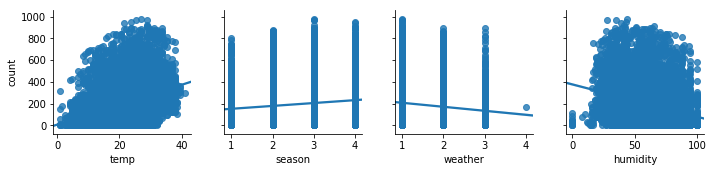

In [26]:
feature_cols=['temp', 'season', 'weather', 'humidity']

sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

## 회귀 측정 지표

In [12]:
# 참과 에측된 응답 값의 예
true=[9,6,7,6]
pred=[8,7,7,12]
# 지난 표현의 각 값은 모델에 대한 단일 예측을 나타내는 점에 유의하자.
# 따라서 네 가지 예측을 네 가지 실제 응답과 비교한다.

from sklearn import metrics
import numpy as np


In [13]:
print(f"MAE: {metrics.mean_absolute_error(true, pred)}")
print(f"MSE: {metrics.mean_squared_error(true, pred)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(true, pred))}")

MAE: 2.0
MSE: 9.5
RMSE:3.082207001484488


```python
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)


def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)
```

In [14]:
from sklearn import metrics

feature_cols = ['temp']
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE

181.1361335742659

In [15]:
feature_cols = ['temp','humidity']
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE

171.7716298771239

In [16]:
feature_cols = ['temp','humidity','season', 'holiday','workingday','windspeed', 'atemp']
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE

155.779953097804